<a href="https://colab.research.google.com/github/arifkyramadhan/Tugas-SLO_Transfer-Learning-Daun-/blob/main/Tugas_SLO_Transfer_Learning_(Daun).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tidak Memakai sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
ls

 3scenes/
'Basic Python, Numpy and Matplotlib.ipynb'
 best_weight_scene_mobileNet.h5
'Coba buka file csv.ipynb'
'coba neural#install the dependencies !pip install kaggle.ipynb'
'Copy of Copy of Wine(Neural Network).ipynb'
'Dataset daun'/
 Daun/
 daun10_test.jpg
 daun11_test.jpg
 daun1_test.jpg
 daun2_test.jpg
 daun3_test.jpg
 daun4_test.jpg
 daun5_test.jpg
 daun6_test.jpg
 daun7_test.jpg
 daun8_test.jpg
 daun9_test.jpg
 daunnon_test.jpg
 daun_test.jpg
 forest_test.jpg
'Neural (Battery).ipynb'
 nnmodel_scene/
'scenes_nn_4 layers.ipynb'
'Simple ANN Python (Neural Network).ipynb'
 StudentsPerformance.csv
'Tugas Transfer Learning.ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Daun")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.30)
print(trainX.shape)
print(testX.shape)

(403, 224, 224, 3)
(173, 224, 224, 3)


In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization

In [ ]:
from keras.layers import Dropout
base_model = MobileNet(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(500, activation='relu')(x)
out = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)


In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=16, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/20
26/26 [==============================] - ETA: 0s - loss: 0.7223 - accuracy: 0.7270
Epoch 00001: val_accuracy improved from -inf to 0.29480, saving model to best_weight_scene_mobileNet.h5
26/26 [==============================] - 81s 3s/step - loss: 0.7223 - accuracy: 0.7270 - val_loss: 7.0048 - val_accuracy: 0.2948
Epoch 2/20
26/26 [==============================] - ETA: 0s - loss: 0.3849 - accuracy: 0.8710
Epoch 00002: val_accuracy improved from 0.29480 to 0.34104, saving model to best_weight_scene_mobileNet.h5
26/26 [==============================] - 80s 3s/step - loss: 0.3849 - accuracy: 0.8710 - val_loss: 5.0607 - val_accuracy: 0.3410
Epoch 3/20
26/26 [==============================] - ETA: 0s - loss: 0.4537 - accuracy: 0.8983
Epoch 00003: val_accuracy improved from 0.34104 to 0.43353, saving model to best_weight_scene_mobileNet.h5
26/26 [==============================] - 80s 3s/step - loss: 0.4537 - accuracy: 0.8983 - val_loss: 4.8397 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


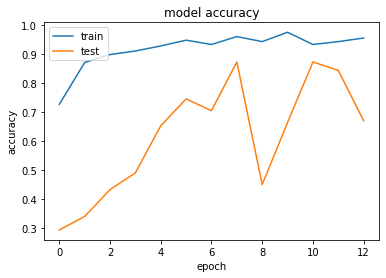

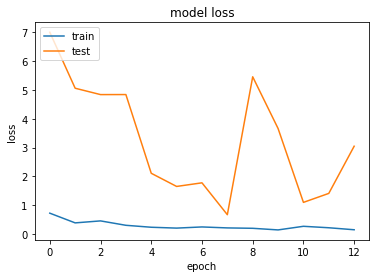

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(predictions)

[INFO] evaluating network...
[[9.81363948e-11 9.99459922e-01 2.62620620e-06 1.12474507e-09
  5.37498854e-04]
 [5.34470385e-12 7.13414093e-03 1.81200521e-05 2.28347767e-06
  9.92845476e-01]
 [8.44537079e-01 4.89763392e-04 1.80502087e-02 1.33542255e-01
  3.38057661e-03]
 [1.33985031e-10 9.99483705e-01 3.59064938e-06 1.24072519e-09
  5.12712053e-04]
 [4.90694454e-08 3.65314736e-05 5.68331197e-05 4.26915794e-05
  9.99863863e-01]
 [5.68050440e-10 4.89705615e-02 1.68457557e-03 4.69716906e-05
  9.49297845e-01]
 [1.24213073e-09 5.24637813e-04 9.95764852e-01 2.55489047e-03
  1.15561357e-03]
 [1.81845987e-08 6.76274158e-06 3.19543149e-04 9.99670148e-01
  3.56439750e-06]
 [3.35387412e-10 1.14659309e-01 5.02398962e-06 3.04530067e-06
  8.85332644e-01]
 [3.47238540e-07 8.56127441e-02 8.88274789e-01 3.84088480e-06
  2.61082705e-02]
 [9.98092234e-01 1.19119250e-06 6.69592919e-05 1.83724973e-03
  2.42341139e-06]
 [8.29986340e-12 2.88285734e-03 7.32971675e-05 3.59581441e-06
  9.97040212e-01]
 [2.5802626

In [ ]:
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_03       1.00      0.44      0.62        27
      GMB_04       0.68      1.00      0.81        42
      GMB_07       0.96      0.84      0.90        32
      GMB_09       1.00      1.00      1.00        33
      nonGMB       0.97      0.95      0.96        39

    accuracy                           0.87       173
   macro avg       0.92      0.85      0.86       173
weighted avg       0.91      0.87      0.87       173



In [ ]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='daunnon_test.jpg'

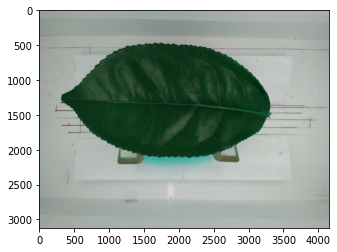

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('daunnon_test.jpg')
image_testing = np.array(image_testing.resize((224,224))) / 255.0
image_testing.shape

(224, 224, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.0534791e-10 1.5608081e-02 1.0324986e-06 1.5555192e-07 9.8439080e-01]]
['nonGMB']
